In [0]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [0]:
env = gym.make("Taxi-v3")
action_num = env.action_space.n
obs_num = env.observation_space.n

In [0]:
# Learning Parameters
episodes_num = 30000
learning_rate = 0.7
max_steps = 99
discount = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_max = 1.0
decay_rate = 0.0005

In [0]:
q1_table = np.zeros((obs_num, action_num))
q2_table = np.zeros((obs_num, action_num))

In [0]:
def greedy(eps):
  pivot = random.uniform(0, 1)
  return pivot > eps

In [7]:
%%time

rewards = []
steps_till_success = []

for episode in range(episodes_num):
  state = env.reset()
  reward = 0
  step = 0
  done = False
  cumul_rewards = 0

  for step in range(max_steps):

    # Choose an action
    if greedy(epsilon):
      action = np.argmax(q1_table[state,:] + q2_table[state,:])
    else:
      action = env.action_space.sample()

    # Perform it
    new_state, reward, done, _ = env.step(action)

    # Update q-table
    a1_max = np.argmax(q1_table[new_state, :])
    a2_max = np.argmax(q2_table[new_state, :])

    if random.uniform(0,1) > 0.5:
      q1_table[state, action] = q1_table[state, action] + learning_rate * (reward + 
                  discount * q2_table[new_state, a1_max] - q1_table[state, action])
    else:
      q2_table[state, action] = q2_table[state, action] + learning_rate * (reward + 
                  discount * q1_table[new_state, a2_max] - q2_table[state, action])
    state = new_state

    cumul_rewards += reward

    if done == True:
      break
  
  # if episode % 4000 == 0:
  #   learning_rate = learning_rate / 2
  epsilon = epsilon_min + (epsilon_max - epsilon_min)*np.exp(-decay_rate * episode) 
  rewards.append(cumul_rewards)

env.close()
print(f'Average reward:{np.mean(rewards)}')
# print(f'Min step to success: {min(steps_till_success)}')

Average reward:-6.5271333333333335
CPU times: user 11.2 s, sys: 6.52 ms, total: 11.2 s
Wall time: 11.2 s


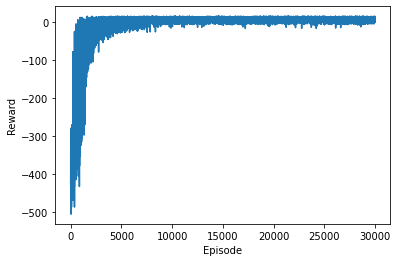

In [8]:
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

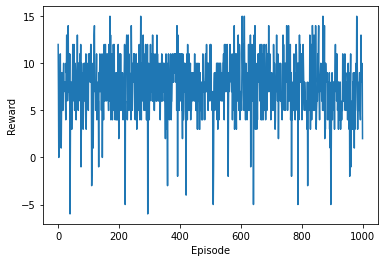

In [9]:
plt.plot(rewards[-1001:-1])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [14]:
print(q1_table)

[[  0.           0.           0.           0.           0.
    0.        ]
 [  2.7507273    3.94947753   2.75196218   3.94946598   5.20997639
   -5.05052462]
 [  7.93349184   9.40367562   7.93349184   9.40367562  10.9512375
    0.40367562]
 ...
 [ 10.9512375   12.58025     10.95123651   9.40367562   1.9512375
    1.9512375 ]
 [  0.76746882   6.53681692  -6.31853176   5.39129644  -7.26649431
  -17.02695099]
 [ 15.96168498   8.61186018  16.08722953  18.           7.065737
    6.95639834]]


In [15]:
print(q2_table)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 2.74789572  3.94935157  2.75159424  3.94840073  5.20997639 -5.05055831]
 [ 7.93349101  9.40367556  7.93349184  9.40367562 10.9512375   0.40367562]
 ...
 [10.9512375  12.58025    10.95123749  9.40367525  1.9512375   1.95123749]
 [ 1.3688623   6.53681642 -6.42232784  2.05698234 -6.13181057 -6.19851058]
 [14.54695336 14.06092456 15.99857126 18.          6.51132821  1.7975211 ]]


In [0]:
q_table = q1_table + q2_table

In [11]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):

        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            print("Number of steps", step + 1)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 12
****************************************************
EPISODE  1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 15
****************************************************
EPISODE  2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 16
****************************************************
EPISODE  3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 6
****************************************************
EPISODE  4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
Number of steps 13


In [13]:
reward_eval = []

for episode in range(1000):
    total_reward = 0
    state = env.reset()
    done = False

    for step in range(max_steps):
        
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)

        total_reward += reward
        
        if done:
          break
        state = new_state
      
    reward_eval.append(total_reward)
env.close()

print(f'Average reward: {np.mean(reward_eval)}')
print(np.var(reward_eval))

Average reward: 7.955
6.606975


In [0]:
df2 = pd.DataFrame()
df2['rewards'] = rewards
df2.to_csv('Q_double_tab_Taxi_30000_rewards.csv')
files.download(r'Q_double_tab_Taxi_30000_rewards.csv')